### **Import libraries** ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Read the data** ###

In [2]:
mov = pd.read_csv('/content/mymoviedb.csv')

### **Look the data** ###

In [3]:
mov.head(2)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...


### **Check the data info** ###

In [4]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


### **Check the duplicates** ###

In [5]:
mov.duplicated().sum()

np.int64(0)

### **Check the null value** ###

In [6]:
mov.isnull().sum()

,0
Release_Date,0
Title,9
Overview,9
Popularity,10
Vote_Count,10
Vote_Average,10
Original_Language,10
Genre,11
Poster_Url,11


### **Change the datatypes** ###

In [7]:
mov['Vote_Count'] = pd.to_numeric(mov['Vote_Count'], errors='coerce')
mov['Vote_Average'] = pd.to_numeric(mov['Vote_Average'], errors='coerce')

In [8]:
mov['Release_Date'] = pd.to_datetime(mov['Release_Date'], errors='coerce')

/tmp/ipython-input-8-2415630379.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  mov['Release_Date'] = pd.to_datetime(mov['Release_Date'], errors='coerce')


### **Checking info** ###

In [9]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Overview           9828 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9826 non-null   float64       
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 691.8+ KB


### **Describe the data** ###

In [10]:
mov.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9827,9827.000000,9826.000000,9826.000000
mean,2006-09-23 11:05:51.317797888,40.320570,1392.943721,6.439467
min,1902-04-17 00:00:00,7.100000,0.000000,0.000000
25%,2000-10-18 00:00:00,16.127500,146.000000,5.900000
50%,2011-09-13 00:00:00,21.191000,444.000000,6.500000
75%,2017-11-22 00:00:00,35.174500,1376.000000,7.100000
max,2024-07-03 00:00:00,5083.954000,31077.000000,10.000000
std,NaN,108.874308,2611.303856,1.129797


### **Remove unnessary columns** ###

In [11]:
mov1 = mov[['Release_Date', 'Title',
         'Popularity', 'Vote_Count',
       'Vote_Average',
       'Genre']].copy()

### **Check columns** ###

In [12]:
mov1.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

### **Check percentage of data missing** ###

In [13]:
mov1.isnull().mean()*100

,0
Release_Date,0.101657
Title,0.091491
Popularity,0.101657
Vote_Count,0.111823
Vote_Average,0.111823
Genre,0.111823


### **Check the shape** ###

In [14]:
mov1.shape

(9837, 6)

### **Drop duplicates value** ###

In [15]:
mov1.drop_duplicates(inplace=True)

### **Drop null value** ###

In [16]:
mov1.dropna(inplace=True)

In [17]:
mov1.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122.0,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War"


### **Extract year into a new column** ###

In [18]:
mov1['Release_Year'] = mov1['Release_Date'].dt.year
mov1.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller",2022


In [19]:
mov1.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122.0,6.3,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War",2021


In [20]:
def categorize_col(mov1, col, labels):
    # Define edges based on quantiles
    edges = [
        mov1[col].describe()['min'],
        mov1[col].describe()['25%'],
        mov1[col].describe()['50%'],
        mov1[col].describe()['75%'],
        mov1[col].describe()['max']
    ]

    # Categorize using pd.cut()
    mov1[col] = pd.cut(mov1[col], edges, labels=labels, duplicates='drop')
    return mov1

In [21]:
labels = ['not_popular', 'below_avg', 'average', 'popular']

categorize_col(mov1, 'Vote_Average', labels)

mov1['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [22]:
mov1.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122.0,below_avg,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793.0,average,"Action, Adventure, Thriller, War",2021


In [23]:
mov1['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2411
below_avg,2398


In [24]:
mov1.dropna(inplace=True)
mov1.isnull().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0
Release_Year,0


In [25]:
mov1.shape

(9726, 7)

In [26]:
mov1.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction",2021
1,2022-03-01,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller",2022
2,2022-02-25,No Exit,2618.087,122.0,below_avg,Thriller,2022
3,2021-11-24,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy",2021
4,2021-12-22,The King's Man,1895.511,1793.0,average,"Action, Adventure, Thriller, War",2021


In [27]:
mov1['Genre'] = mov1['Genre'].str.split(', ')

mov1 = mov1.explode('Genre').reset_index(drop=True)

mov1.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction,2021
3,2022-03-01,The Batman,3827.658,1151.0,popular,Crime,2022
4,2022-03-01,The Batman,3827.658,1151.0,popular,Mystery,2022


In [28]:
mov1.shape

(25551, 7)

In [29]:
mov1['Genre'] = mov1['Genre'].astype('category')
mov1['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [30]:
mov1.nunique()

,0
Release_Date,5845
Title,9414
Popularity,8087
Vote_Count,3265
Vote_Average,4
Genre,19
Release_Year,100


### **EDA** ###

In [31]:
# what is the most frequent genre of movies released on netlix?

# which has highest vote in vote avg columns

# what movie got the highest popularity? what's its genre?

# what movie got the lowest popularity? what's its genre?

# which year has the most filmmed movies?

### **<-- Data Visualization -->** ###

In [32]:
mov1['Genre'].describe()

,Genre
count,25551
unique,19
top,Drama
freq,3715


### **what is the most frequent genre of movies released on netlix?** ###

/tmp/ipython-input-50-2016931005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


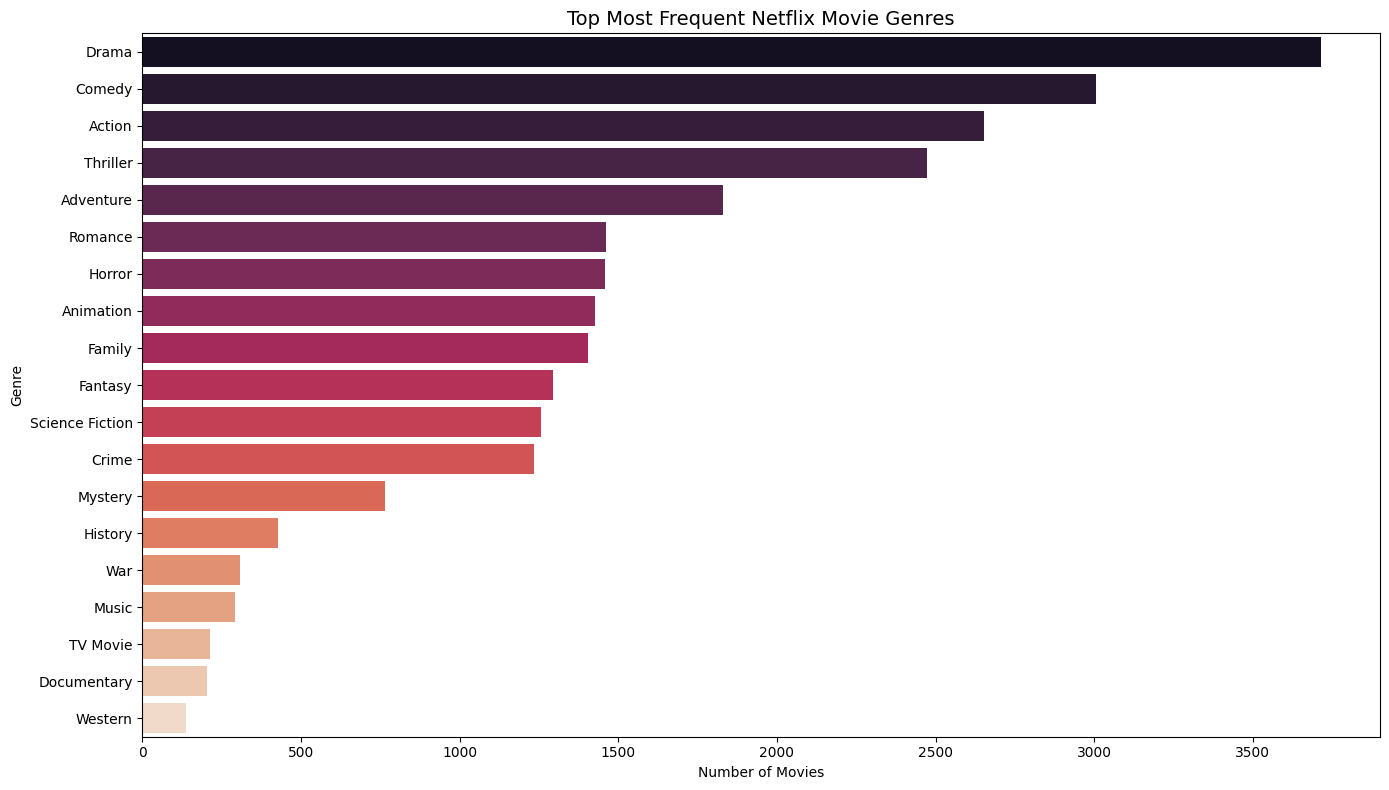

In [50]:
top_genres = mov1['Genre'].value_counts()

plt.figure(figsize=(14, 8))
sns.barplot(
    y=top_genres.index,
    x=top_genres.values,
    order=top_genres.index,
    palette='rocket'
)

plt.title("Top Most Frequent Netflix Movie Genres", fontsize=14)
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [40]:
mov1.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure,2021


### **which has highest vote in vote avg columns** ###

/tmp/ipython-input-41-2591543403.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(y = 'Vote_Average', data=mov1, kind='count', palette='rocket',


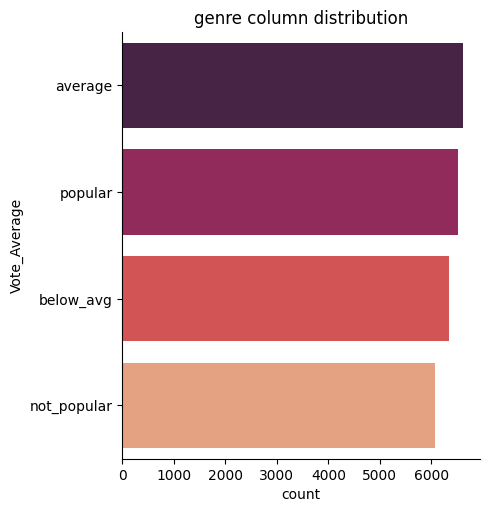

In [41]:
sns.catplot(y = 'Vote_Average', data=mov1, kind='count', palette='rocket',
            order = mov1['Vote_Average'].value_counts().index)

plt.title("genre column distribution")
plt.show()

### **what movie got the highest popularity? what's its genre?** ###

In [37]:
most_popular_movie = mov1.loc[mov1['Popularity'].idxmax()]

# Step 4: Display the result
print("🎬 Movie Title:", most_popular_movie['Title'])
print("🔥 Popularity Score:", most_popular_movie['Popularity'])
print("🎭 Genre(s):", most_popular_movie['Genre'])

🎬 Movie Title: Spider-Man: No Way Home
🔥 Popularity Score: 5083.954
🎭 Genre(s): Action


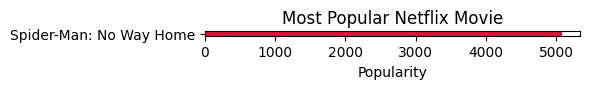

In [43]:
plt.figure(figsize=(6, 1))
plt.barh([most_popular_movie['Title']], [most_popular_movie['Popularity']], color='crimson')
plt.xlabel("Popularity")
plt.title("Most Popular Netflix Movie")
plt.tight_layout()
plt.show()

### **what movie got the lowest popularity? what's its genre?** ###

In [69]:
low_popular_movie = mov1.loc[mov1['Popularity'].idxmin()]

# Step 4: Display the result
print("🎬 Movie Title:", low_popular_movie['Title'])
print("🔥 Popularity Score:", low_popular_movie['Popularity'])
print("🎭 Genre(s):", low_popular_movie['Genre'])

🎬 Movie Title: The United States vs. Billie Holiday
🔥 Popularity Score: 13.354
🎭 Genre(s): Music


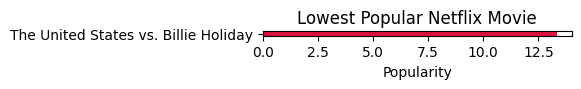

In [70]:
plt.figure(figsize=(6, 1))
plt.barh([low_popular_movie['Title']], [low_popular_movie['Popularity']], color='crimson')
plt.xlabel("Popularity")
plt.title("Lowest Popular Netflix Movie")
plt.tight_layout()
plt.show()

In [54]:
mov1.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre', 'Release_Year'],
      dtype='object')

### **which year has the most filmmed movies?** ###

In [60]:
yearly_count = mov1['Release_Year'].value_counts().sort_index()

most_movie_year = yearly_count.idxmax()
most_movie_count = yearly_count.max()

print(f"The year with the most movies is {most_movie_year} with {most_movie_count} movies")

The year with the most movies is 2021 with 1636 movies


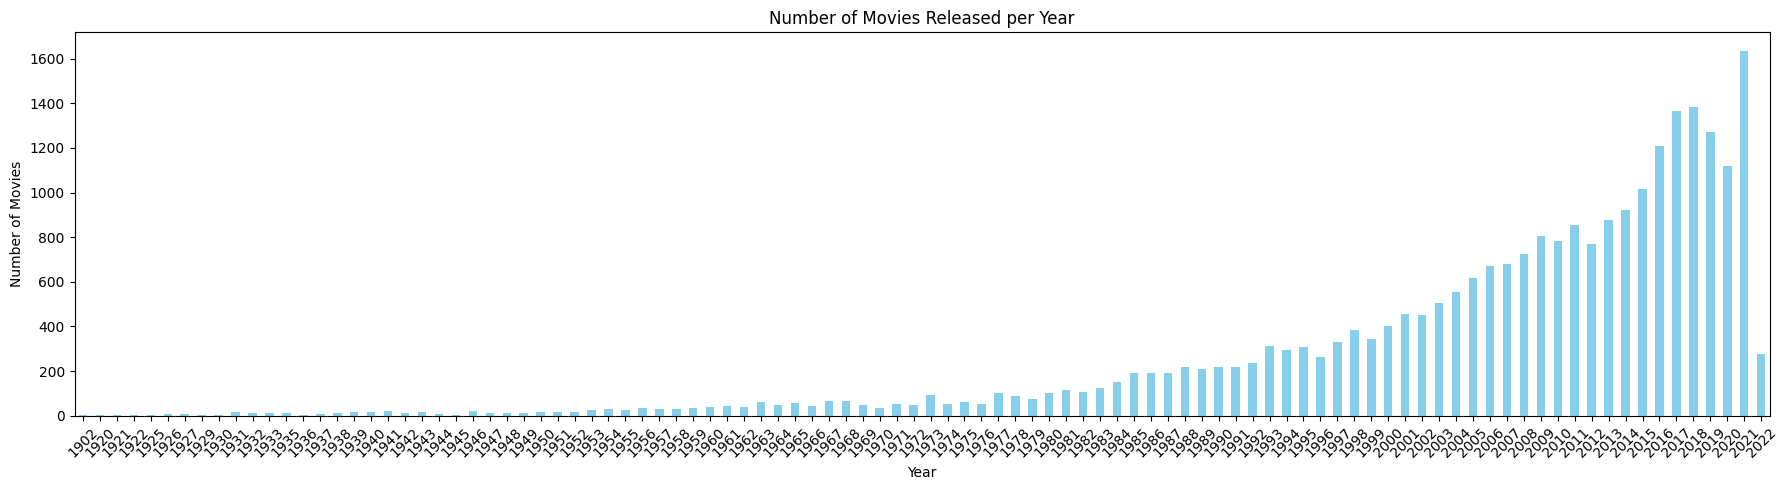

In [67]:
plt.figure(figsize=(18, 5))
yearly_count.plot(kind='bar', color='skyblue')
plt.title("Number of Movies Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
mov1.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre', 'Release_Year'],
      dtype='object')

In [75]:
mov1.dtypes

,0
Release_Date,datetime64[ns]
Title,object
Popularity,float64
Vote_Count,float64
Vote_Average,category
Genre,object
Release_Year,int32


In [77]:
mov1.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,popular,Action,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure,2021


### **Are popular movies always highly rated?** ###

Average Popularity by Vote Average Category:


/tmp/ipython-input-82-1863095632.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popularity_by_vote_average = mov1.groupby('Vote_Average')['Popularity'].mean().reset_index()


,Vote_Average,Popularity
0,not_popular,33.293460
1,below_avg,34.617511
2,average,43.349780
3,popular,55.819880


/tmp/ipython-input-82-1863095632.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vote_Average', y='Popularity', data=popularity_by_vote_average, palette='viridis')


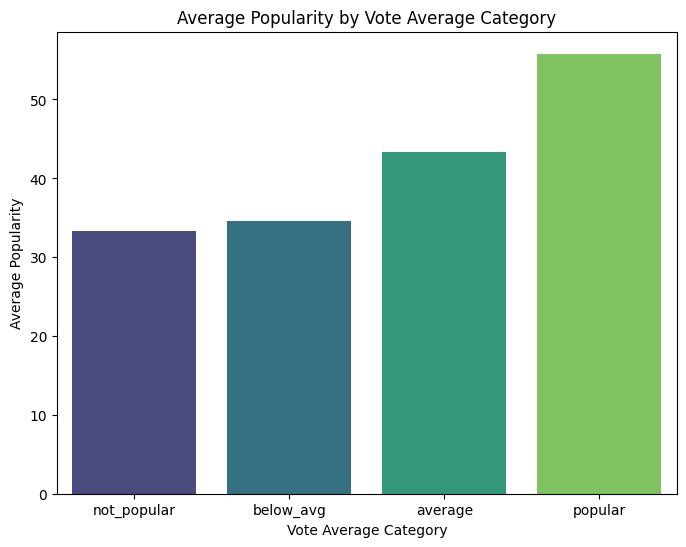

In [82]:
# Calculate the mean popularity for each Vote_Average category
popularity_by_vote_average = mov1.groupby('Vote_Average')['Popularity'].mean().reset_index()

# Display the result
print("Average Popularity by Vote Average Category:")
display(popularity_by_vote_average)

# Visualize the relationship
plt.figure(figsize=(8, 6))
sns.barplot(x='Vote_Average', y='Popularity', data=popularity_by_vote_average, palette='viridis')
plt.title('Average Popularity by Vote Average Category')
plt.xlabel('Vote Average Category')
plt.ylabel('Average Popularity')
plt.show()

### **Boxplot of Vote_Average by Genre** ###

/tmp/ipython-input-85-1743195106.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-85-1743195106.py:17: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


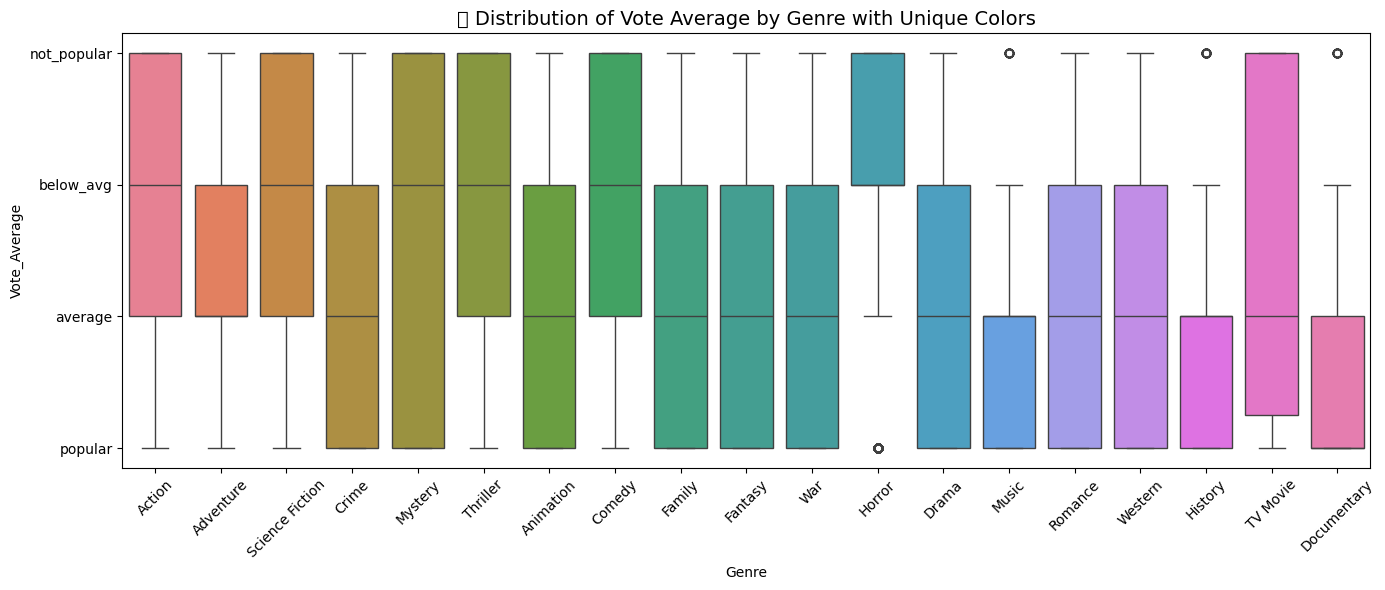

In [85]:
# Get unique genres and assign colors
genres = mov1['Genre'].unique()
palette = sns.color_palette("husl", len(genres))
genre_color_map = dict(zip(genres, palette))

# Plot using color map
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=mov1,
    x='Genre',
    y='Vote_Average',
    palette=genre_color_map
)

plt.xticks(rotation=45)
plt.title("🎨 Distribution of Vote Average by Genre with Unique Colors", fontsize=14)
plt.tight_layout()
plt.show()